In [141]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [142]:
data_2020 = pd.read_csv('./data/2020_dong.csv')
data_2019 = pd.read_csv('./data/2019_dong.csv')

In [143]:
data_2020

,기준일ID,시간대구분,행정동코드,총생활인구수,시도명,시군구명,읍면동명,법정동코드,동리명,10대_남,20대_남,30대_남,10대_합,20대_합,30대_합
0,20200101,0,11620625,24188,서울특별시,관악구,인헌동,11620101,봉천동,453,2031,2471,875,4403,4847
1,20200101,1,11620625,24573,서울특별시,관악구,인헌동,11620101,봉천동,451,2110,2517,909,4544,4919
2,20200101,2,11620625,24817,서울특별시,관악구,인헌동,11620101,봉천동,445,2182,2549,905,4703,4991
3,20200101,3,11620625,24949,서울특별시,관악구,인헌동,11620101,봉천동,442,2215,2604,905,4764,5065
4,20200101,4,11620625,25194,서울특별시,관악구,인헌동,11620101,봉천동,456,2271,2608,941,4850,5097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901355,20201231,19,11230720,16830,서울특별시,동대문구,휘경제1동,11230109,휘경동,409,1740,1322,721,3954,2652
5901356,20201231,20,11230720,16887,서울특별시,동대문구,휘경제1동,11230109,휘경동,385,1759,1308,803,3991,2632
5901357,20201231,21,11230720,16672,서울특별시,동대문구,휘경제1동,11230109,휘경동,421,1799,1272,833,4031,2598
5901358,20201231,22,11230720,16065,서울특별시,동대문구,휘경제1동,11230109,휘경동,408,1720,1219,826,3924,2493


In [144]:
data_2020=pd.DataFrame(data_2020.groupby(['기준일ID','법정동코드','시간대구분','시군구명','동리명'],as_index=False).sum())
data_2019=pd.DataFrame(data_2019.groupby(['기준일ID','법정동코드','시간대구분','시군구명','동리명'],as_index=False).sum())


In [145]:
data_2020['기준일ID']=data_2020['기준일ID'].astype('str')
data_2019['기준일ID']=data_2019['기준일ID'].astype('str')
data_2020['기준일ID']=pd.to_datetime(data_2020['기준일ID'])
data_2019['기준일ID']=pd.to_datetime(data_2019['기준일ID'])

In [146]:
data_2020.set_index('기준일ID',inplace=True)
data_2019.set_index('기준일ID',inplace=True)

In [147]:
data_2020['year']=data_2020.index.year
data_2020['month']=data_2020.index.month
data_2019['year']=data_2019.index.year
data_2019['month']=data_2019.index.month

In [148]:
month_2020=pd.DataFrame(data_2020[['총생활인구수','10대_남','20대_남','30대_남','10대_합','20대_합','30대_합']].groupby([data_2020['법정동코드'],data_2020['시군구명'],data_2020['동리명'],data_2020['month']]).resample('M').sum()).reset_index()
month_2019=pd.DataFrame(data_2019[['총생활인구수','10대_남','20대_남','30대_남','10대_합','20대_합','30대_합']].groupby([data_2019['법정동코드'],data_2019['시군구명'],data_2019['동리명'],data_2019['month']]).resample('M').sum()).reset_index()

In [8]:
year=pd.DataFrame(data_2020['총생활인구수'].groupby([data_2020['행정동코드'],data_2020['시군구명'],data_2020['동리명']]).resample('Y').sum()).reset_index()

In [149]:
city_2020=month_2020[['동리명','총생활인구수','10대_남','20대_남','30대_남','10대_합','20대_합','30대_합']].groupby([month_2020['시군구명'],month_2020['동리명'],month_2020['month']]).sum().reset_index()
city_2019=month_2019[['동리명','총생활인구수','10대_남','20대_남','30대_남','10대_합','20대_합','30대_합']].groupby([month_2019['시군구명'],month_2019['동리명'],month_2019['month']]).sum().reset_index()

In [150]:
city_list=pd.DataFrame(city_2020['시군구명'])
city_list.drop_duplicates(['시군구명'],keep='first',inplace=True)
city=[]
for i in range(len(city_list)):
    city.append(city_list.iloc[i,0])

2961443


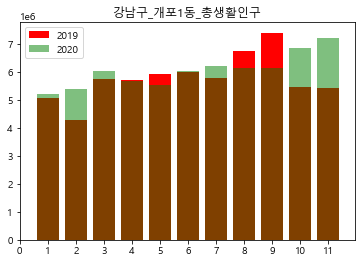

53937180


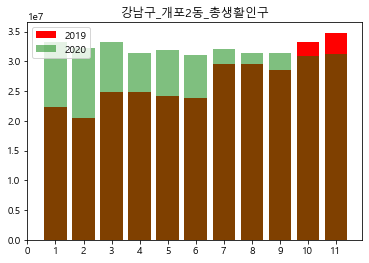

2997781


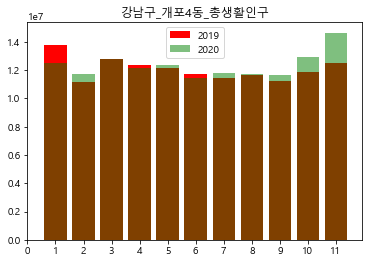

-1384303


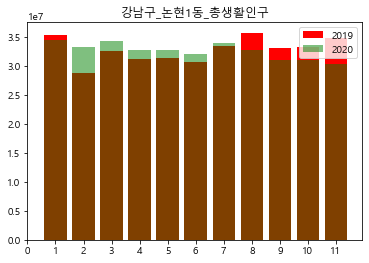

-2202551


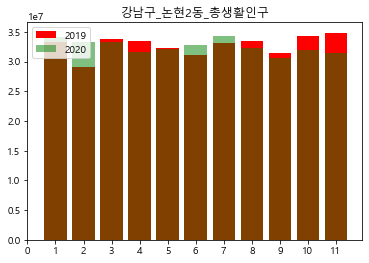

17068237


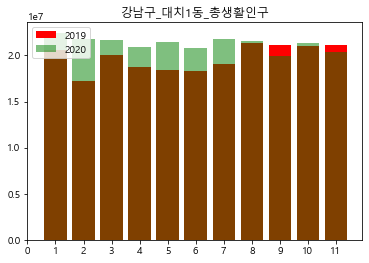

-6796353


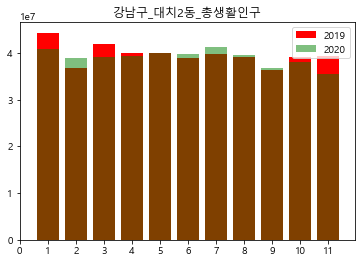

11561723


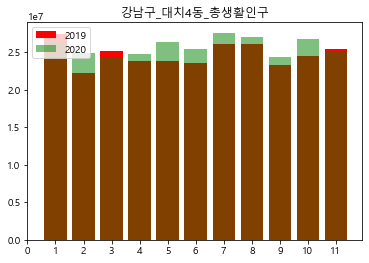

3105994


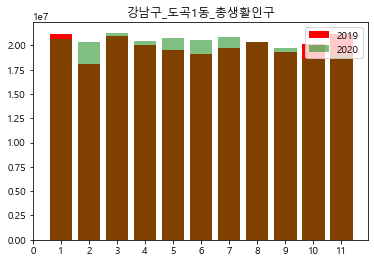

16397971


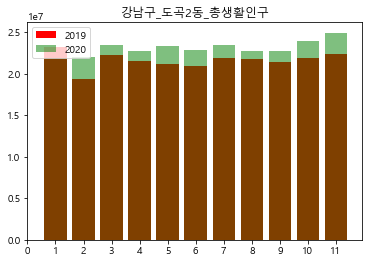

-59106253


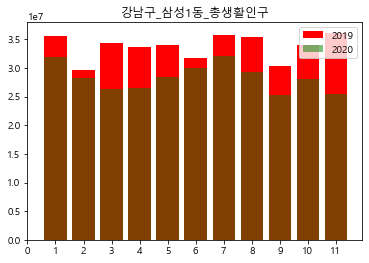

4538050


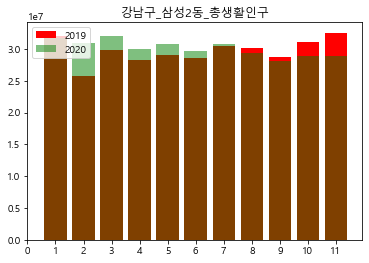

87184044


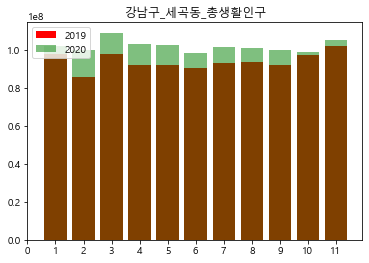

-1018926


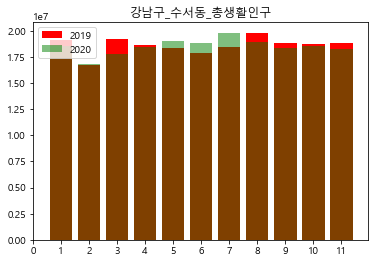

-25866016


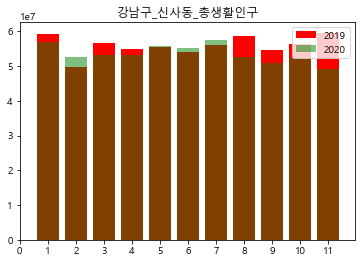

-43915134


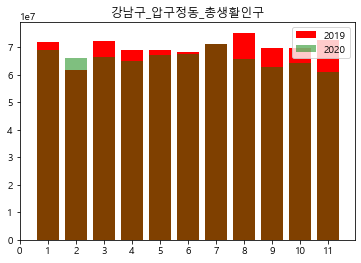

-41643934


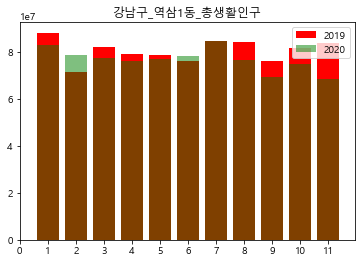

6856183


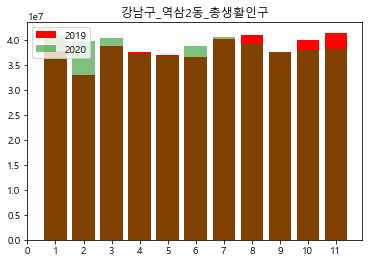

285780


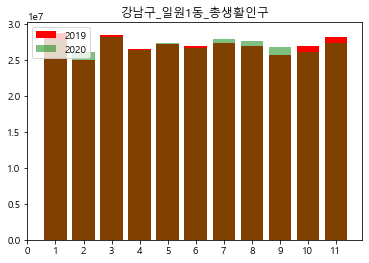

11043405


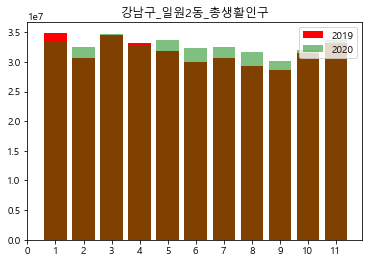

25813230


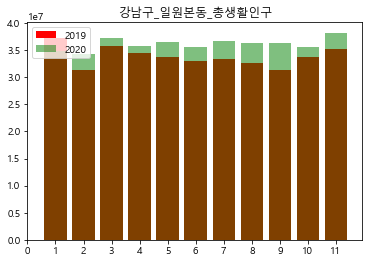

3063943


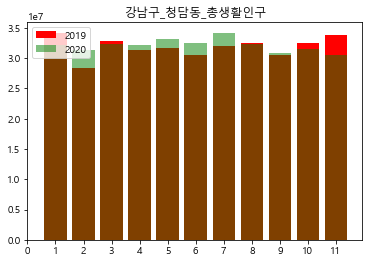

[('세곡동', 87184044), ('개포2동', 53937180), ('일원본동', 25813230), ('대치1동', 17068237), ('도곡2동', 16397971), ('대치4동', 11561723), ('일원2동', 11043405), ('역삼2동', 6856183), ('삼성2동', 4538050), ('도곡1동', 3105994), ('청담동', 3063943), ('개포4동', 2997781), ('개포1동', 2961443), ('일원1동', 285780), ('수서동', -1018926), ('논현1동', -1384303), ('논현2동', -2202551), ('대치2동', -6796353), ('신사동', -25866016), ('역삼1동', -41643934), ('압구정동', -43915134), ('삼성1동', -59106253)]
57536426


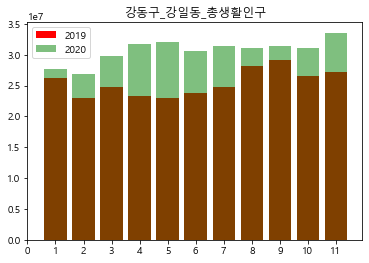

56284083


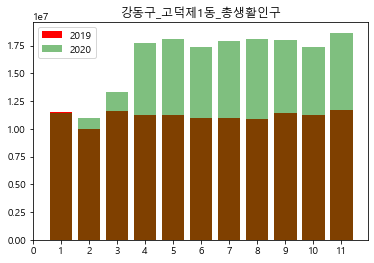

81032351


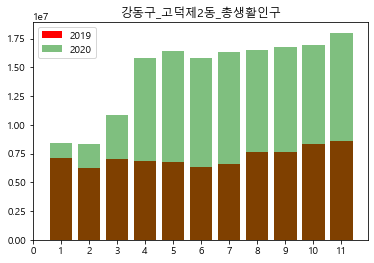

2357754


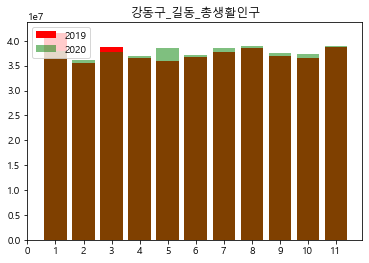

1638246


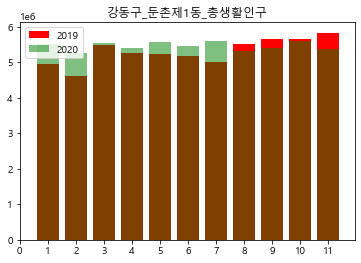

-3281332


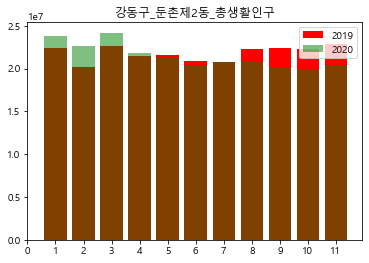

24784072


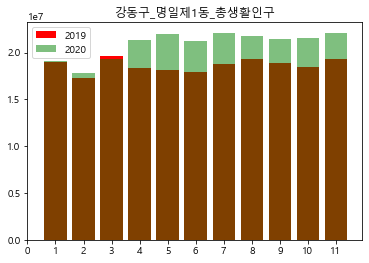

-7897460


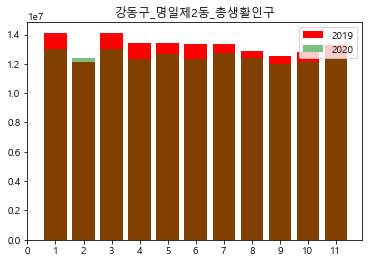

2775343


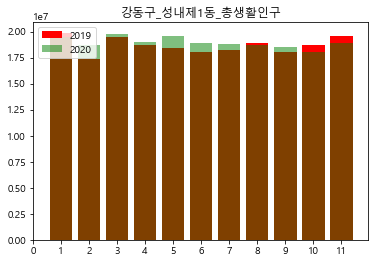

-5569396


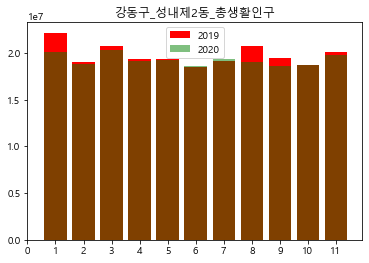

-8148255


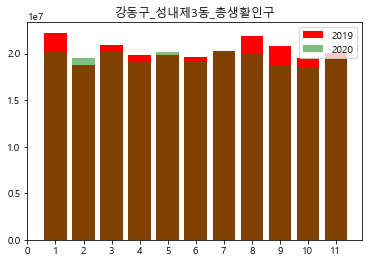

-27161086


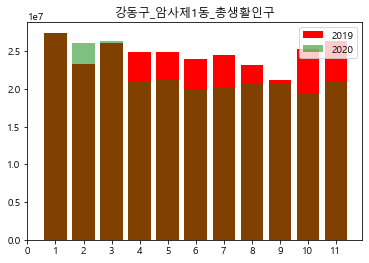

2508022


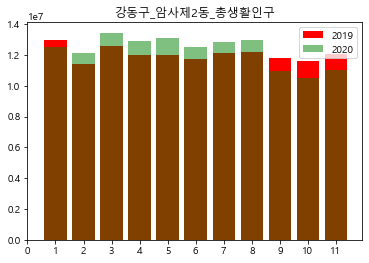

4989409


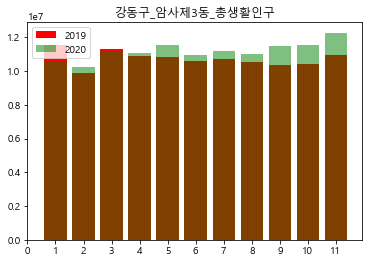

-42759901


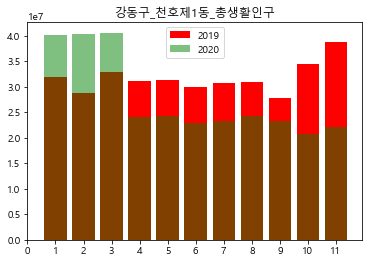

10334644


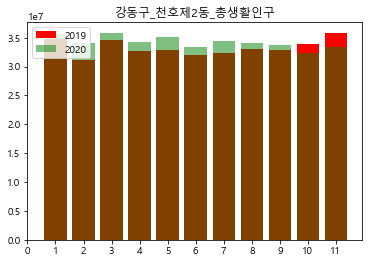

-9784934


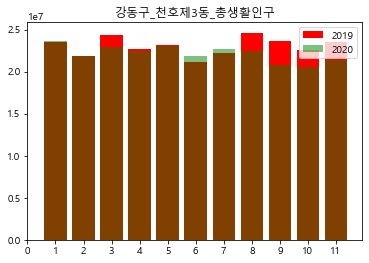

[('고덕제2동', 81032351), ('강일동', 57536426), ('고덕제1동', 56284083), ('명일제1동', 24784072), ('천호제2동', 10334644), ('암사제3동', 4989409), ('성내제1동', 2775343), ('암사제2동', 2508022), ('길동', 2357754), ('둔촌제1동', 1638246), ('둔촌제2동', -3281332), ('성내제2동', -5569396), ('명일제2동', -7897460), ('성내제3동', -8148255), ('천호제3동', -9784934), ('암사제1동', -27161086), ('천호제1동', -42759901)]
9125899


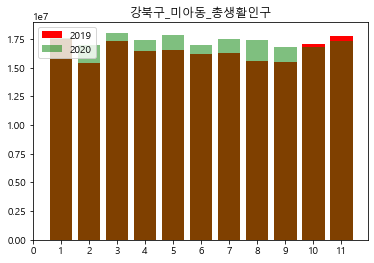

12068655


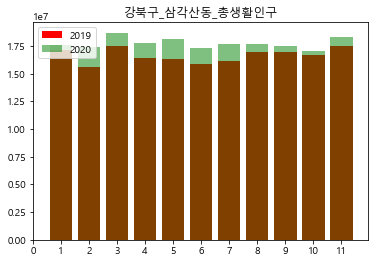

-2241929


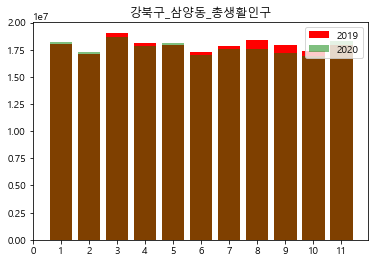

16160508


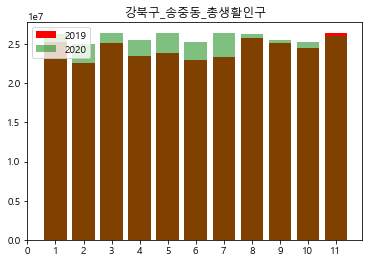

1330083


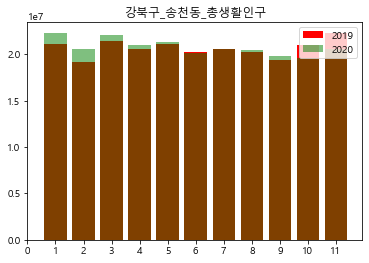

15877056


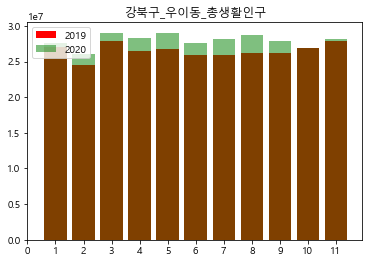

9076237


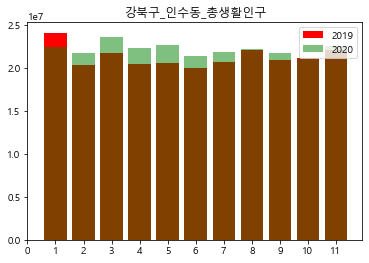

[('송중동', 16160508), ('우이동', 15877056), ('삼각산동', 12068655), ('미아동', 9125899), ('인수동', 9076237), ('송천동', 1330083), ('삼양동', -2241929)]
38239422


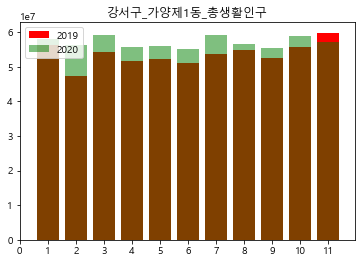

11324551


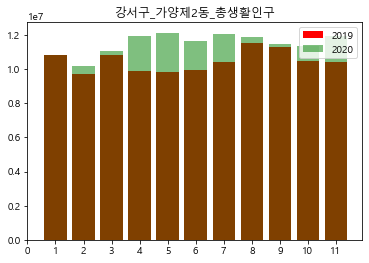

-8225248


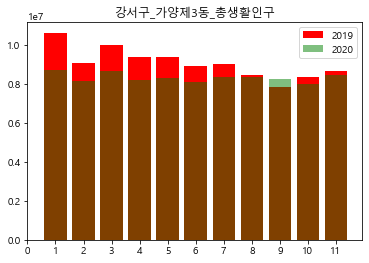

-143549520


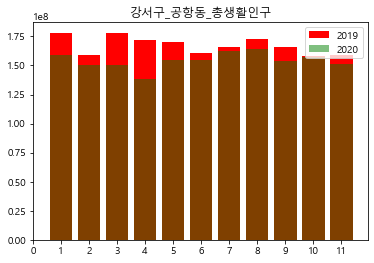

14271529


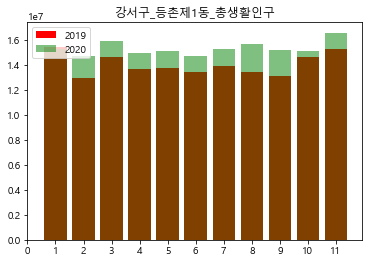

14098193


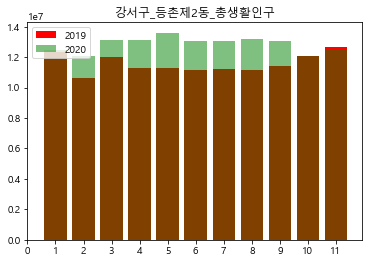

10152047


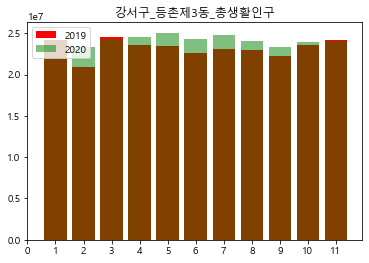

45613434


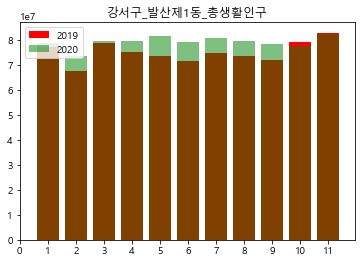

12760440


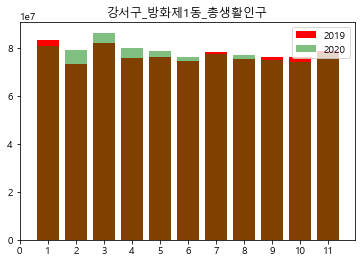

-102836282


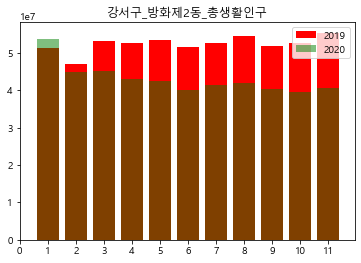

1275956


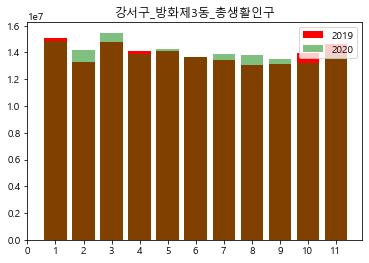

10374864


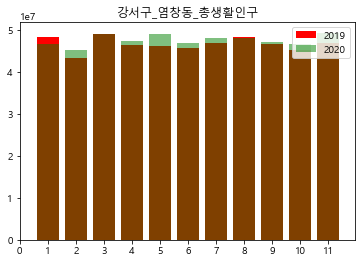

17271230


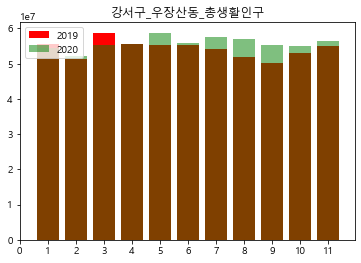

18396773


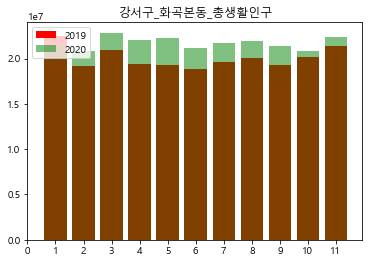

24625704


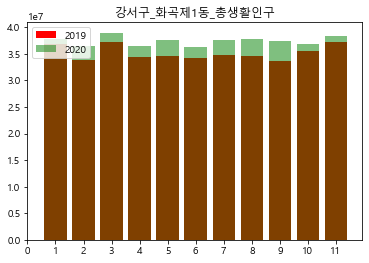

-5006980


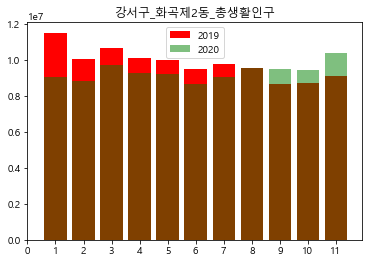

9113122


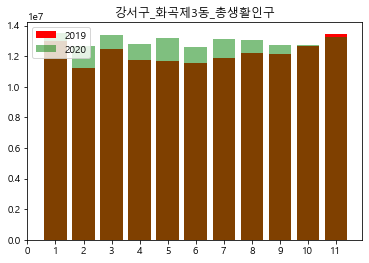

1047129


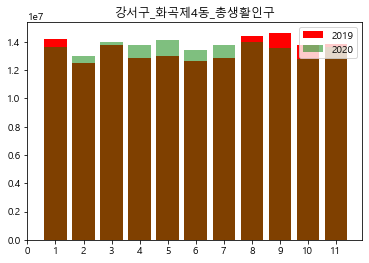

-10867073


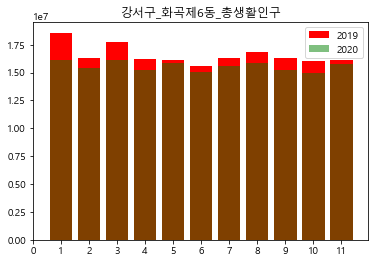

-4095037


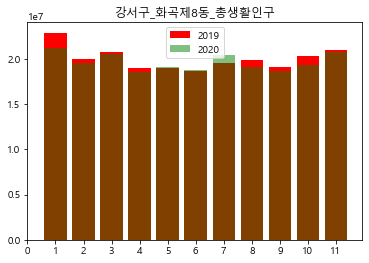

[('발산제1동', 45613434), ('가양제1동', 38239422), ('화곡제1동', 24625704), ('화곡본동', 18396773), ('우장산동', 17271230), ('등촌제1동', 14271529), ('등촌제2동', 14098193), ('방화제1동', 12760440), ('가양제2동', 11324551), ('염창동', 10374864), ('등촌제3동', 10152047), ('화곡제3동', 9113122), ('방화제3동', 1275956), ('화곡제4동', 1047129), ('화곡제8동', -4095037), ('화곡제2동', -5006980), ('가양제3동', -8225248), ('화곡제6동', -10867073), ('방화제2동', -102836282), ('공항동', -143549520)]
-16542739


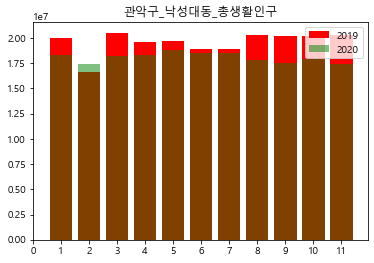

2230982


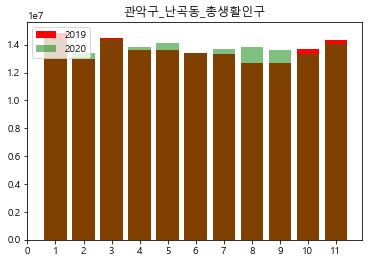

5492276


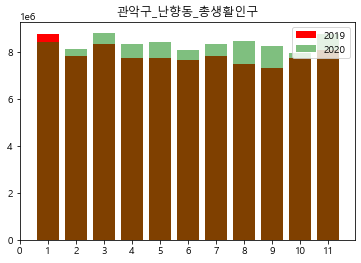

1979770


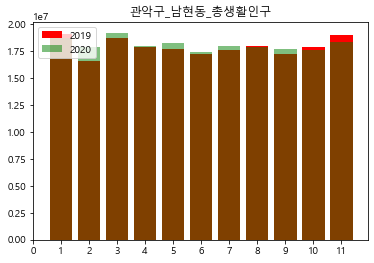

-33510159


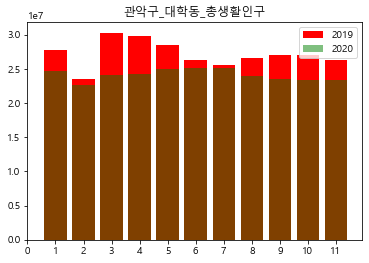

7468455


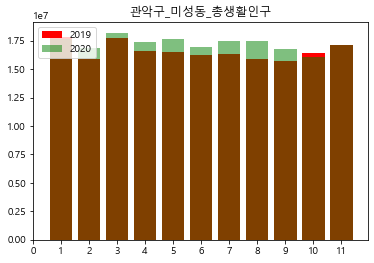

3991462


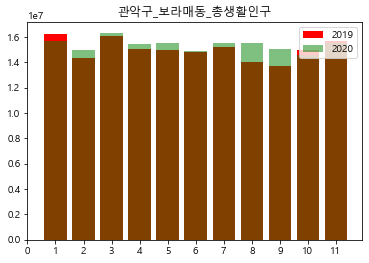

5855055


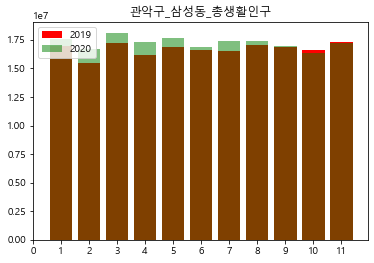

8695819


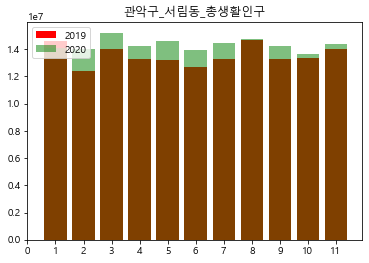

-7566267


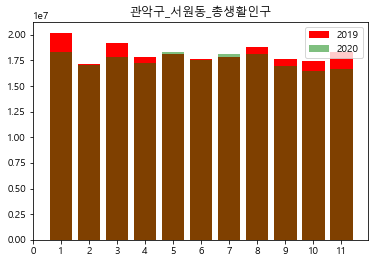

3975592


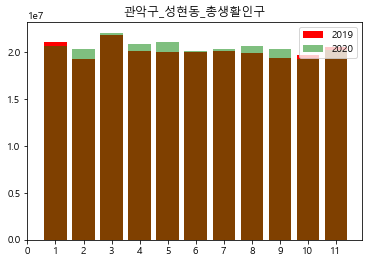

-14732774


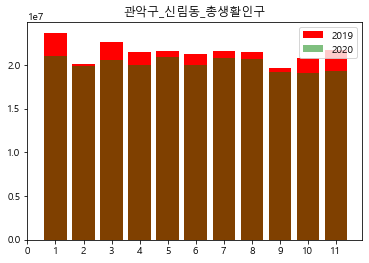

1031317


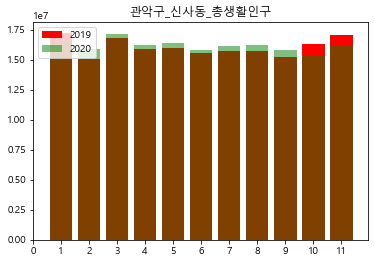

-841888


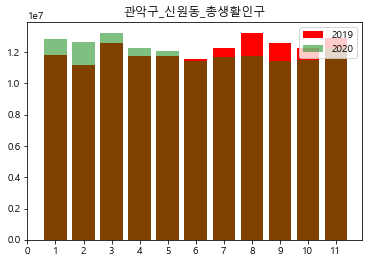

12293979


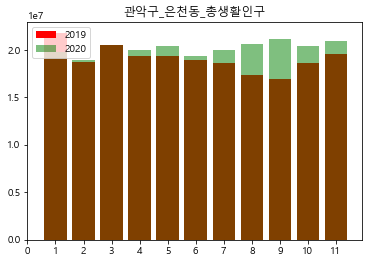

14260237


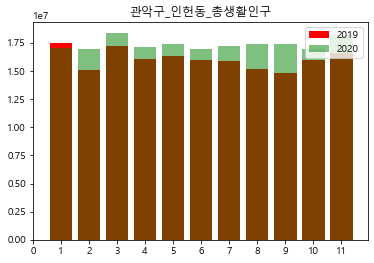

-6405430


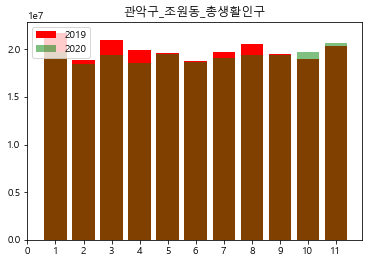

13470272


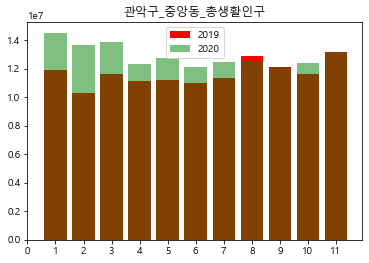

16833680


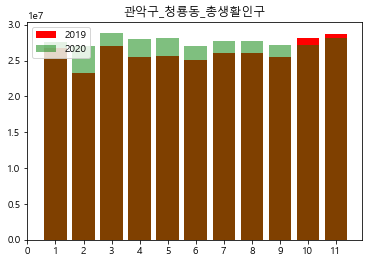

8267668


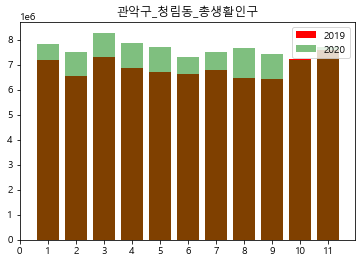

-13092051


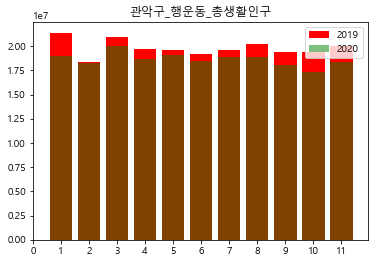

[('청룡동', 16833680), ('인헌동', 14260237), ('중앙동', 13470272), ('은천동', 12293979), ('서림동', 8695819), ('청림동', 8267668), ('미성동', 7468455), ('삼성동', 5855055), ('난향동', 5492276), ('보라매동', 3991462), ('성현동', 3975592), ('난곡동', 2230982), ('남현동', 1979770), ('신사동', 1031317), ('신원동', -841888), ('조원동', -6405430), ('서원동', -7566267), ('행운동', -13092051), ('신림동', -14732774), ('낙성대동', -16542739), ('대학동', -33510159)]
4695136


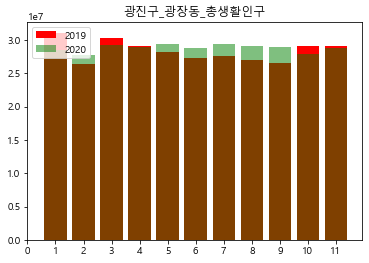

-732817


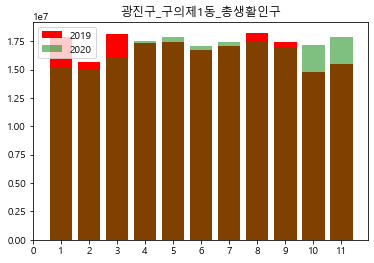

-385087


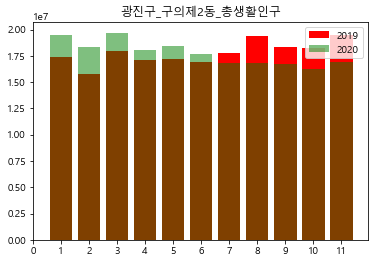

-6034650


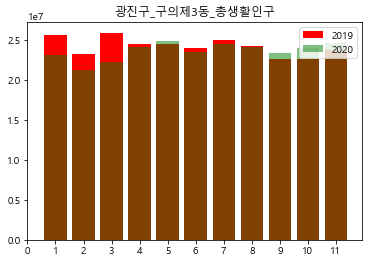

-1270559


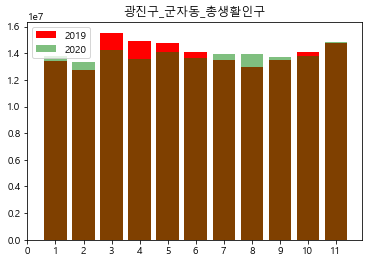

-3117838


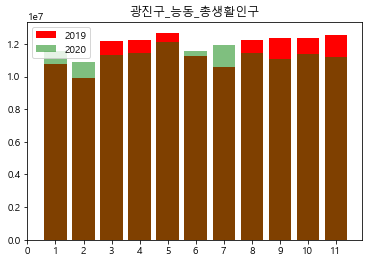

-8004913


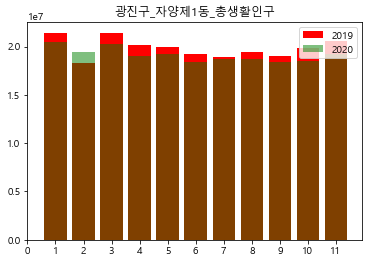

-16110900


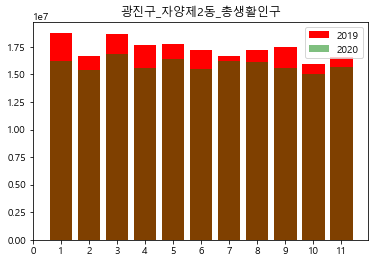

409924


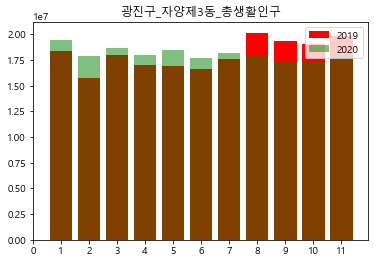

-13378828


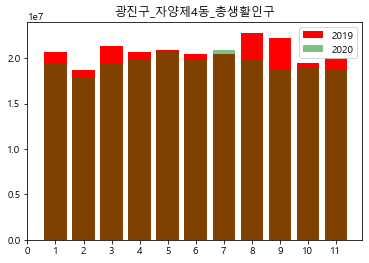

8275606


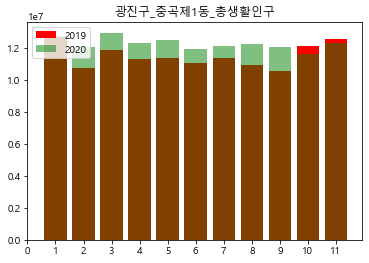

2384805


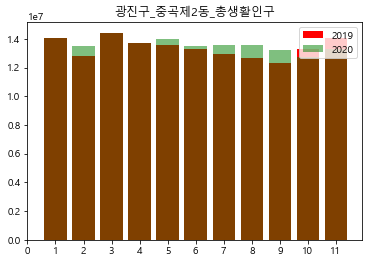

3169056


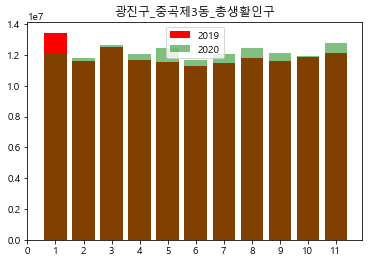

-3126069


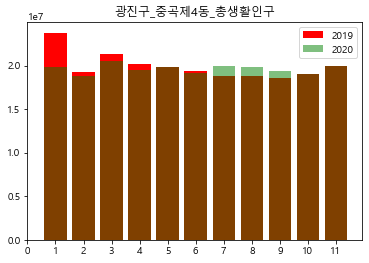

-48777220


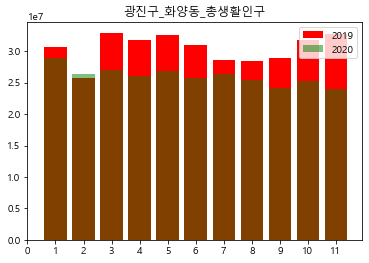

[('중곡제1동', 8275606), ('광장동', 4695136), ('중곡제3동', 3169056), ('중곡제2동', 2384805), ('자양제3동', 409924), ('구의제2동', -385087), ('구의제1동', -732817), ('군자동', -1270559), ('능동', -3117838), ('중곡제4동', -3126069), ('구의제3동', -6034650), ('자양제1동', -8004913), ('자양제4동', -13378828), ('자양제2동', -16110900), ('화양동', -48777220)]
1462285


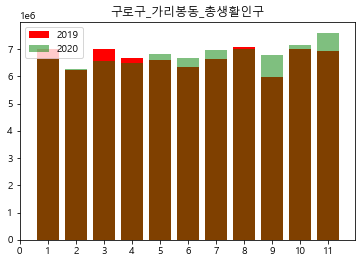

4340440


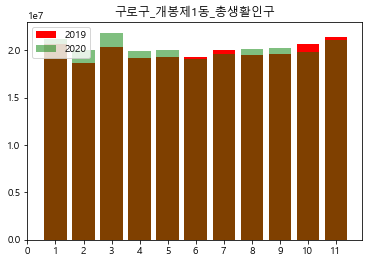

3806903


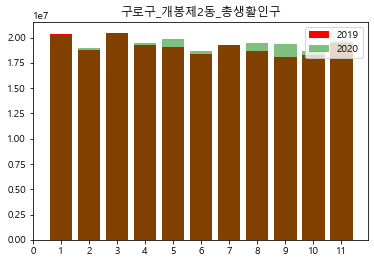

1997189


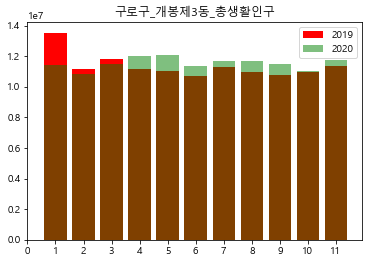

-10650308


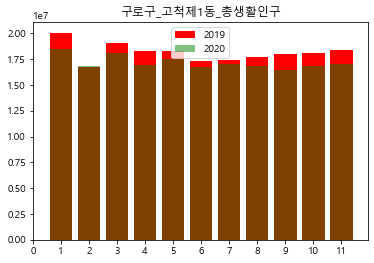

2641352


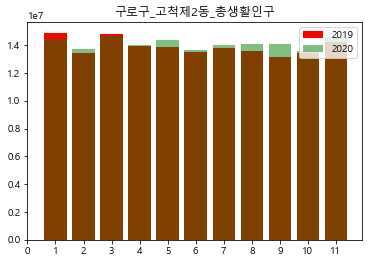

10906563


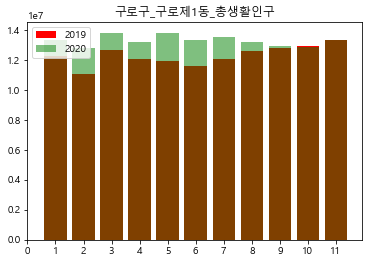

-14638360


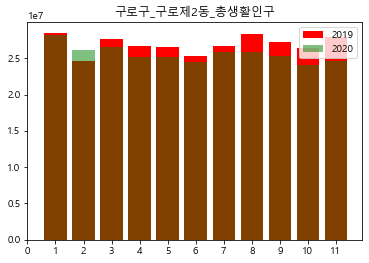

-20069499


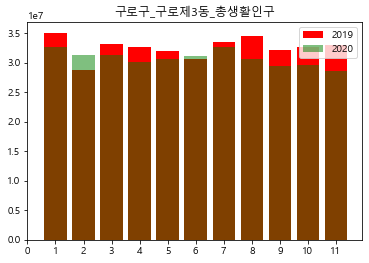

-8026936


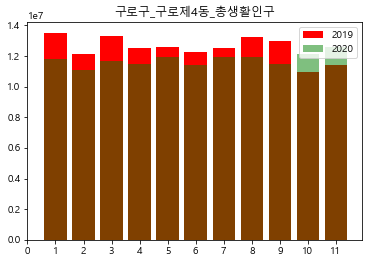

-23596413


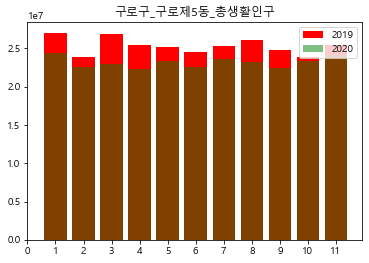

-25589104


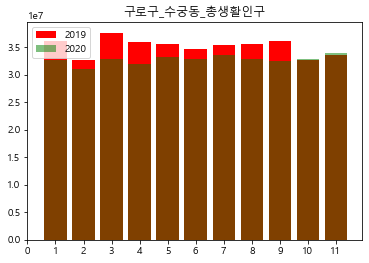

-5630538


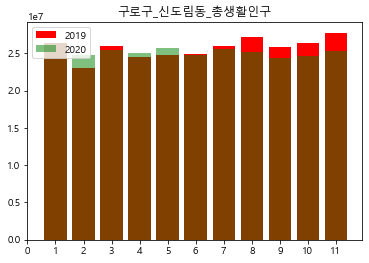

6043611


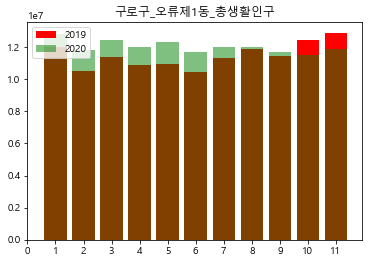

89396164


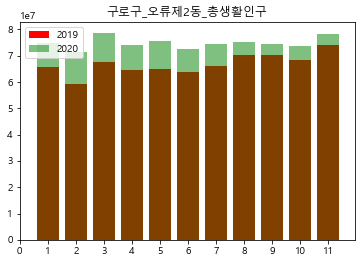

[('오류제2동', 89396164), ('구로제1동', 10906563), ('오류제1동', 6043611), ('개봉제1동', 4340440), ('개봉제2동', 3806903), ('고척제2동', 2641352), ('개봉제3동', 1997189), ('가리봉동', 1462285), ('신도림동', -5630538), ('구로제4동', -8026936), ('고척제1동', -10650308), ('구로제2동', -14638360), ('구로제3동', -20069499), ('구로제5동', -23596413), ('수궁동', -25589104)]
3817839


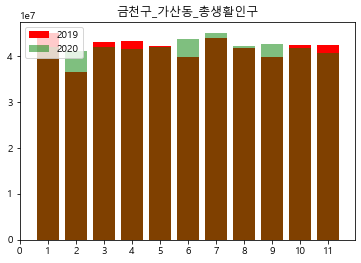

16339185


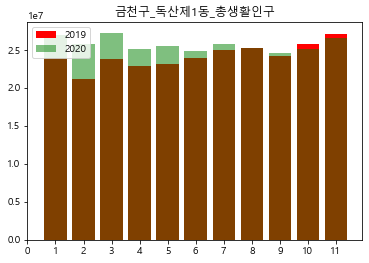

-878393


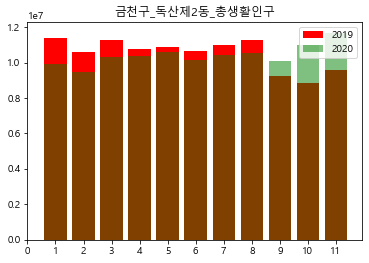

5603631


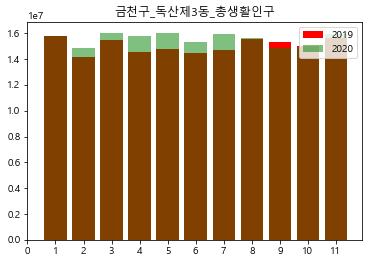

9860390


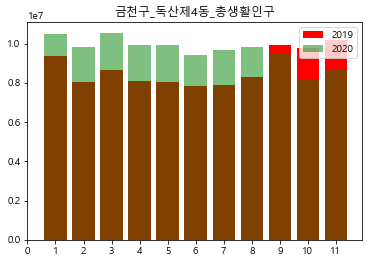

-4656559


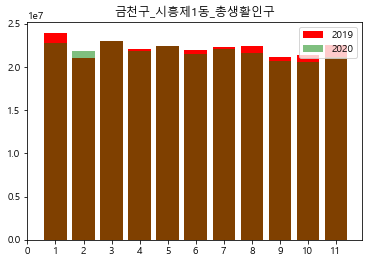

10840467


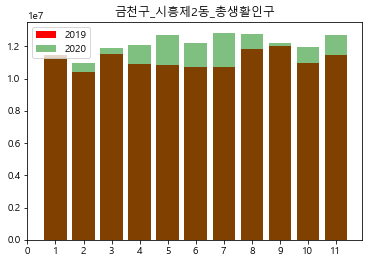

-10246640


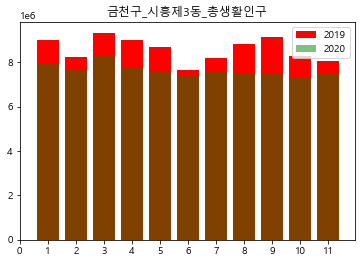

3162988


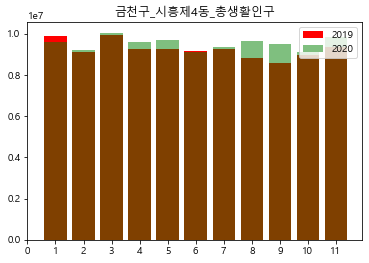

-2032882


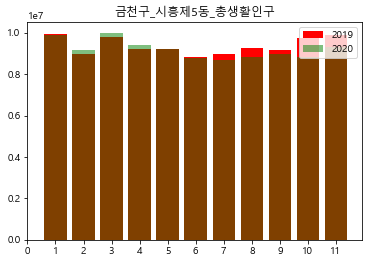

[('독산제1동', 16339185), ('시흥제2동', 10840467), ('독산제4동', 9860390), ('독산제3동', 5603631), ('가산동', 3817839), ('시흥제4동', 3162988), ('독산제2동', -878393), ('시흥제5동', -2032882), ('시흥제1동', -4656559), ('시흥제3동', -10246640)]
14808727


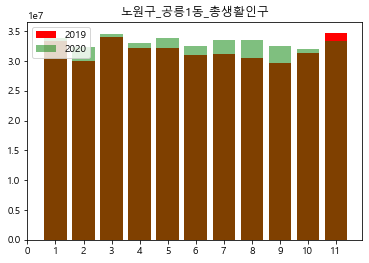

-34346558


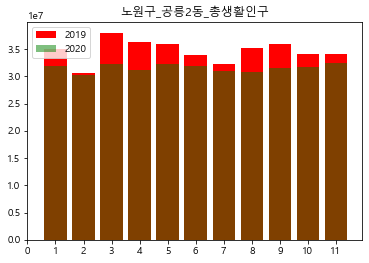

-662618


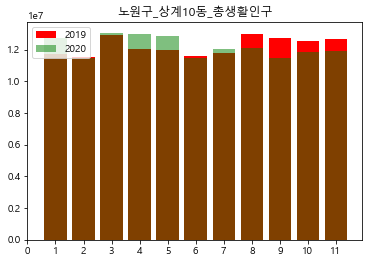

20557085


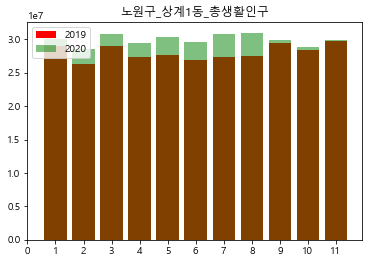

-3230483


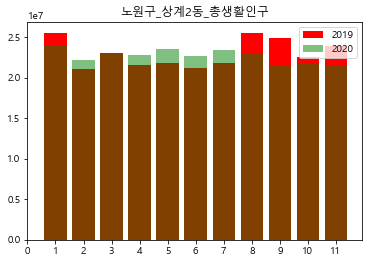

14236432


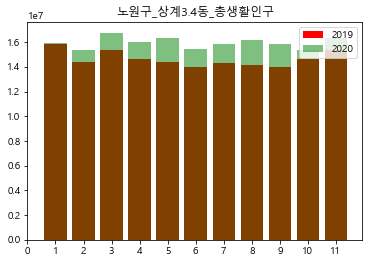

8914295


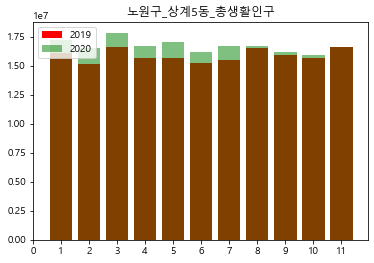

4838628


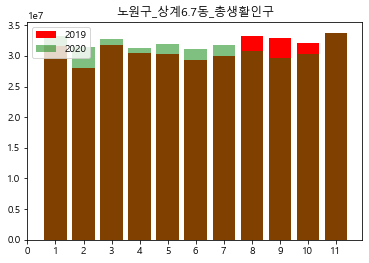

15141959


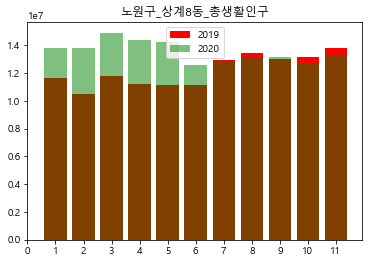

6848945


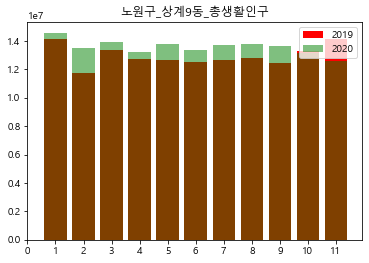

-522109


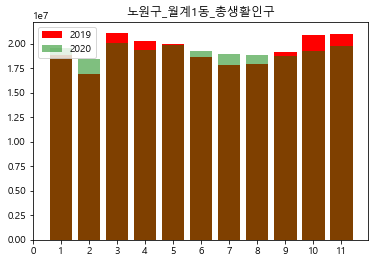

6278905


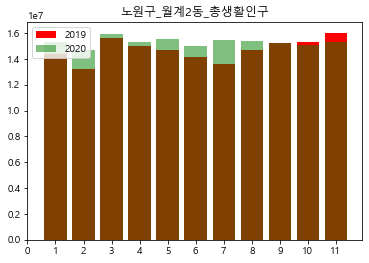

18653976


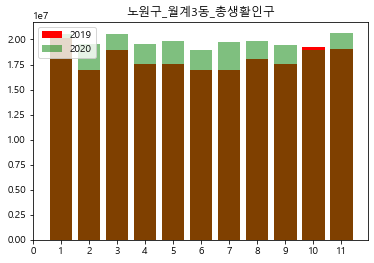

8286231


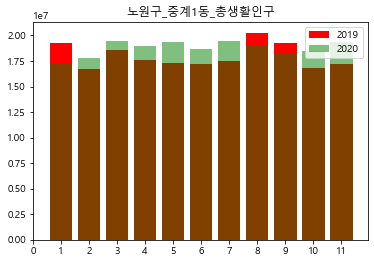

1488767


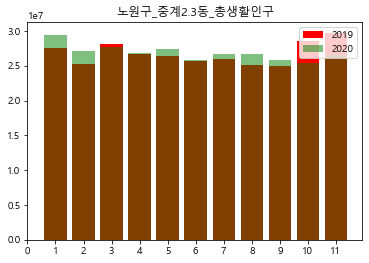

15401634


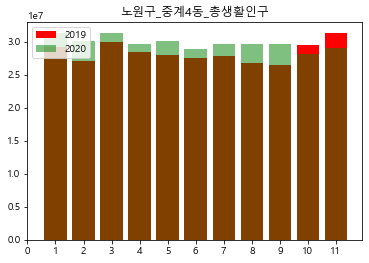

16552740


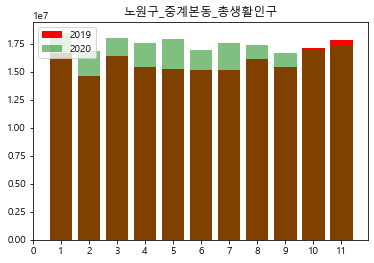

-9561407


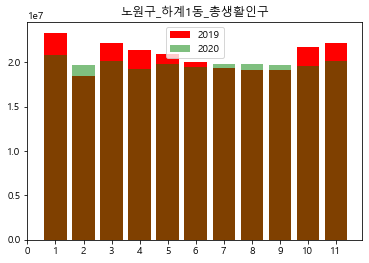

-13091646


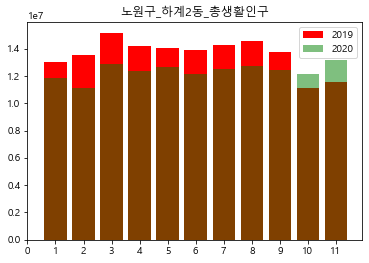

[('상계1동', 20557085), ('월계3동', 18653976), ('중계본동', 16552740), ('중계4동', 15401634), ('상계8동', 15141959), ('공릉1동', 14808727), ('상계3.4동', 14236432), ('상계5동', 8914295), ('중계1동', 8286231), ('상계9동', 6848945), ('월계2동', 6278905), ('상계6.7동', 4838628), ('중계2.3동', 1488767), ('월계1동', -522109), ('상계10동', -662618), ('상계2동', -3230483), ('하계1동', -9561407), ('하계2동', -13091646), ('공릉2동', -34346558)]
4305082


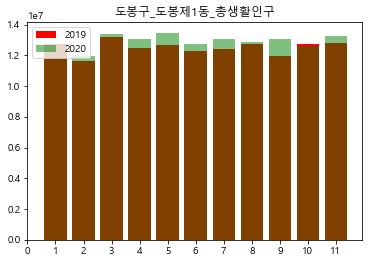

914697


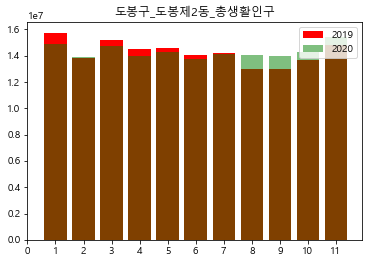

10852444


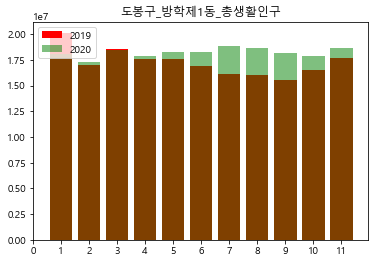

-13795351


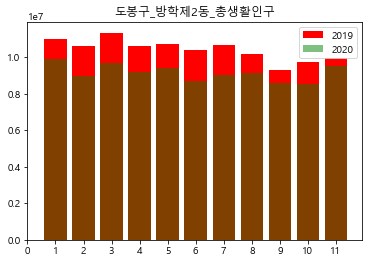

14205806


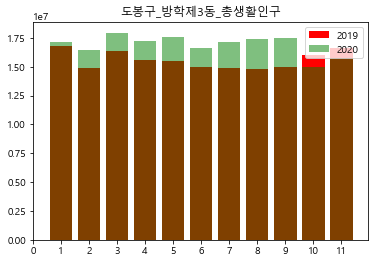

-9033435


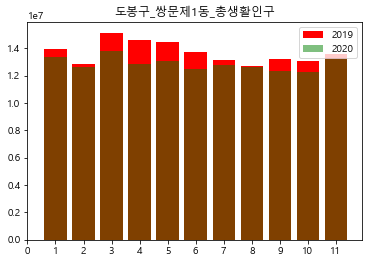

6420721


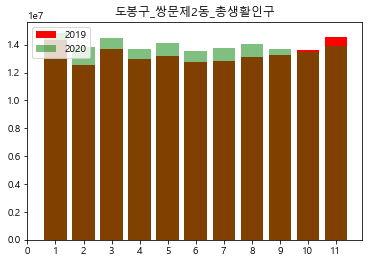

-2926469


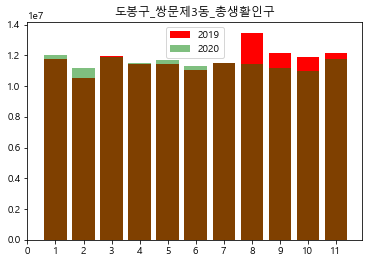

3919101


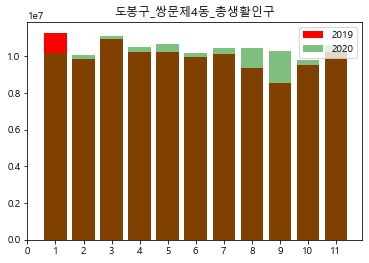

-4183198


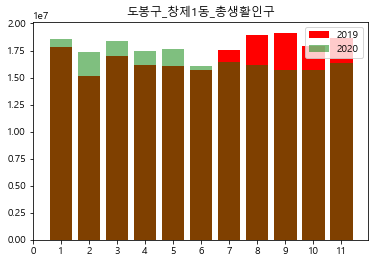

7634844


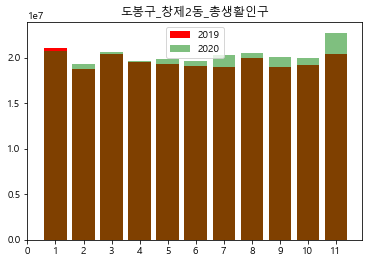

6939068


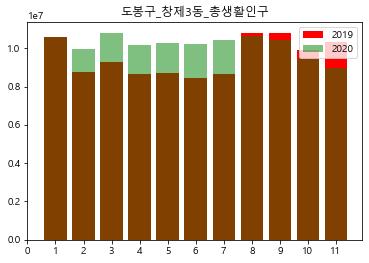

2253944


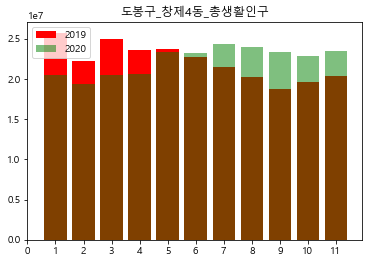

-21454045


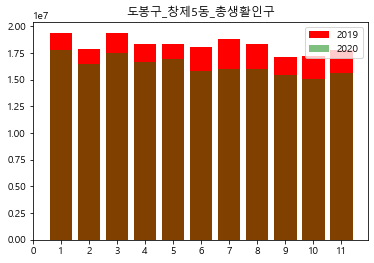

[('방학제3동', 14205806), ('방학제1동', 10852444), ('창제2동', 7634844), ('창제3동', 6939068), ('쌍문제2동', 6420721), ('도봉제1동', 4305082), ('쌍문제4동', 3919101), ('창제4동', 2253944), ('도봉제2동', 914697), ('쌍문제3동', -2926469), ('창제1동', -4183198), ('쌍문제1동', -9033435), ('방학제2동', -13795351), ('창제5동', -21454045)]


IndexError: list index out of range

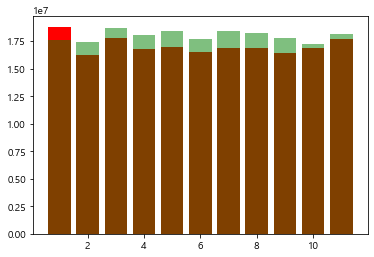

In [129]:
bar_width=1
alpha=0.5

for i in range(len(city)):
    dong_sum={}
    dong_list=pd.DataFrame(city_2020[city_2020['시군구명']==city[i]])
    dong_list.drop_duplicates(['동리명'],keep='first',inplace=True)
    dong=[]
    print(dong)
    for j in range(len(dong_list)):
        dong.append(dong_list.iloc[j,1])
    dong_s=[]
    for k in range(len(dong)):
        p1=plt.bar([1,2,3,4,5,6,7,8,9,10,11],city_2019[(city_2019['시군구명']==city[i])&(city_2019['동리명']==dong[k])].iloc[:11,3],color='red',label='2019')
        p2=plt.bar([i+bar_width for i in range(11)],city_2020[(city_2020['시군구명']==city[i])&(city_2020['동리명']==dong[k])].iloc[:11,3],color='green',label='2020',alpha=alpha)
        print(city_2020[(city_2020['시군구명']==city_[i])&(city_2020['동리명']==dong[k])].iloc[:11,3].sum()-city_2019[(city_2019['시군구명']==city_[i])&(city_2019['동리명']==dong[k])].iloc[:11,3].sum())
        dong_s.append(city_2020[(city_2020['시군구명']==city[i])&(city_2020['동리명']==dong[k])].iloc[:11,3].sum()-city_2019[(city_2019['시군구명']==city[i])&(city_2019['동리명']==dong[k])].iloc[:11,3].sum())
        plt.legend()
        plt.title(city[i]+'_'+dong[k]+'_'+'총생활인구')
        plt.xticks([j for j in range(12)])
#         plt.savefig(dong_list[i]+'총생활인구수')
        plt.show()
    
    for i in range(len(dong)):
        dong_sum[dong[i]]=dong_s[i]
    def f2(x):
        return x[1]
    a=sorted(dong_sum.items(),key=f2,reverse=True)
    print(a)

In [151]:
def city_name(city,n):
    bar_width=1
    alpha=0.5

    for i in range(len(city)):
        dong_sum={}
        dong_list=pd.DataFrame(city_2020[city_2020['시군구명']==city[i]])
        dong_list.drop_duplicates(['동리명'],keep='first',inplace=True)
        dong=[]
        
        for j in range(len(dong_list)):
            dong.append(dong_list.iloc[j,1])
#         print(dong)
        dong_s=[]
        for k in range(len(dong)):
            p1=plt.bar([1,2,3,4,5,6,7,8,9,10,11],city_2019[(city_2019['시군구명']==city[i])&(city_2019['동리명']==dong[k])].iloc[:11,n],color='red',label='2019')
            p2=plt.bar([i+bar_width for i in range(11)],city_2020[(city_2020['시군구명']==city[i])&(city_2020['동리명']==dong[k])].iloc[:11,n],color='green',label='2020',alpha=alpha)
            print(city_2020[(city_2020['시군구명']==city[i])&(city_2020['동리명']==dong[k])].iloc[:11,n].sum()-city_2019[(city_2019['시군구명']==city[i])&(city_2019['동리명']==dong[k])].iloc[:11,n].sum())
            dong_s.append(city_2020[(city_2020['시군구명']==city[i])&(city_2020['동리명']==dong[k])].iloc[:11,n].sum()-city_2019[(city_2019['시군구명']==city[i])&(city_2019['동리명']==dong[k])].iloc[:11,n].sum())
            plt.legend()
            plt.title(city[i]+'_'+dong[k]+'_'+'총생활인구')
            plt.xticks([j for j in range(12)])
    #         plt.savefig(dong_list[i]+'총생활인구수')
            plt.show()

        for i in range(len(dong)):
            dong_sum[dong[i]]=dong_s[i]
        def f2(x):
            return x[1]
        a=sorted(dong_sum.items(),key=f2,reverse=True)
        print(a)

 n =  3 : 총생활인구수	4 : 10_남	5 : 20대_남	6 : 30대_남	7 : 10대_합	8 : 20대_합	9 : 30대_합

625807


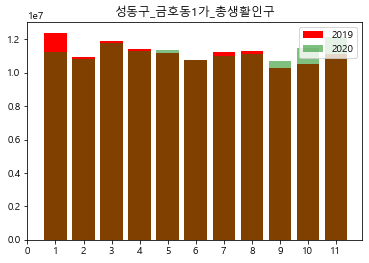

-3949046


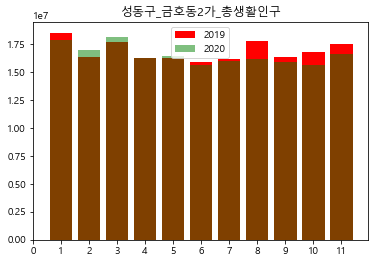

-3949046


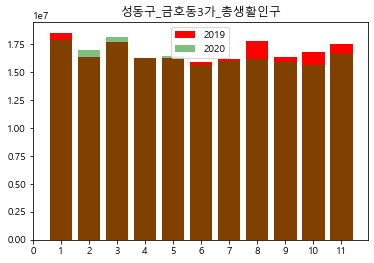

15457092


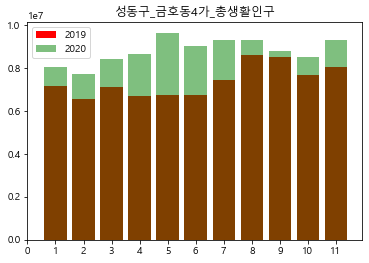

42022278


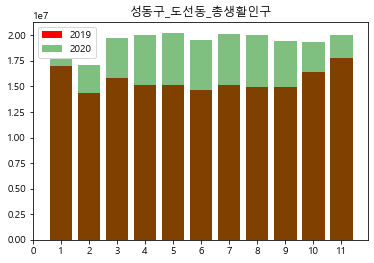

-14318993


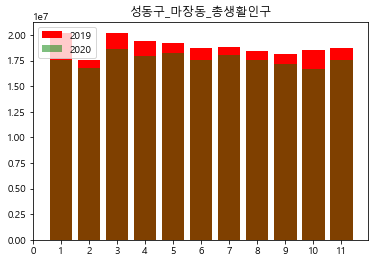

-21638564


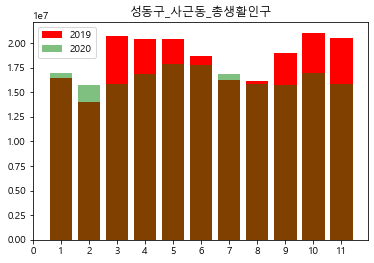

42022278


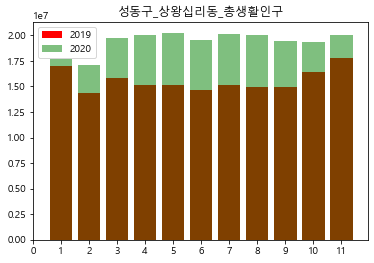

15031559


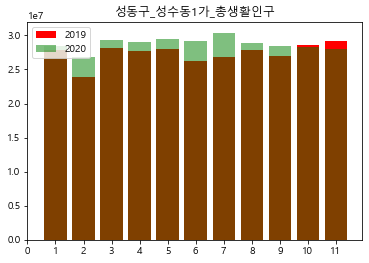

14110396


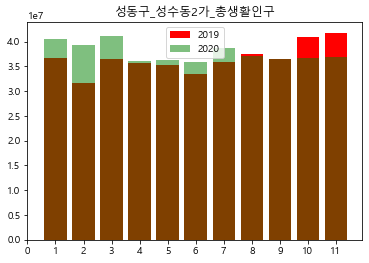

-5740344


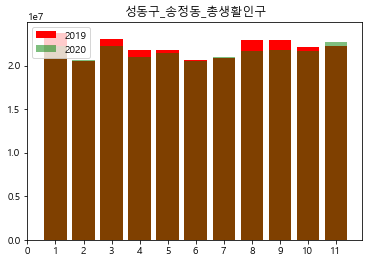

-7224663


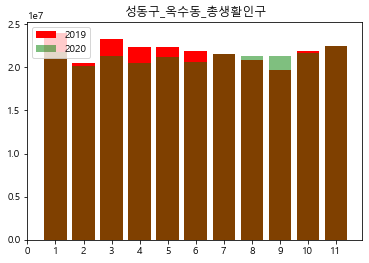

-9481128


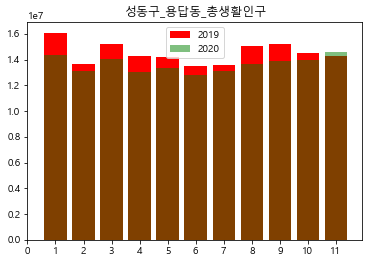

-8003738


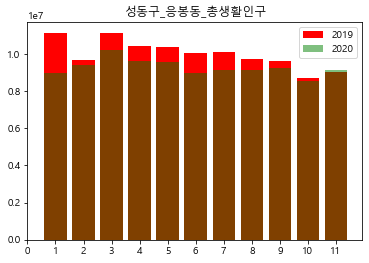

57026196


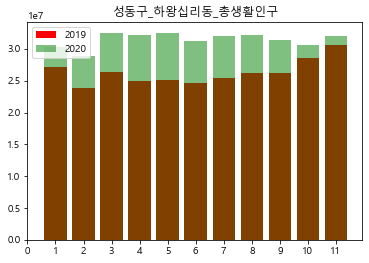

-66187002


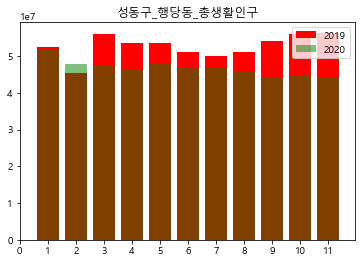

42022278


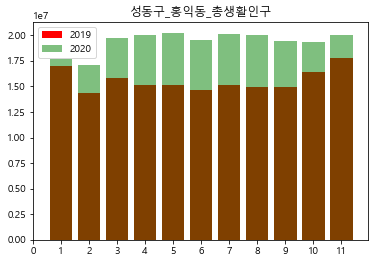

[('하왕십리동', 57026196), ('도선동', 42022278), ('상왕십리동', 42022278), ('홍익동', 42022278), ('금호동4가', 15457092), ('성수동1가', 15031559), ('성수동2가', 14110396), ('금호동1가', 625807), ('금호동2가', -3949046), ('금호동3가', -3949046), ('송정동', -5740344), ('옥수동', -7224663), ('응봉동', -8003738), ('용답동', -9481128), ('마장동', -14318993), ('사근동', -21638564), ('행당동', -66187002)]


In [152]:
city_name(['성동구'],3)

2961443


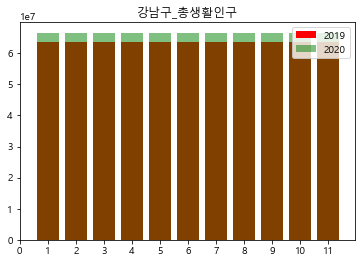

57536426


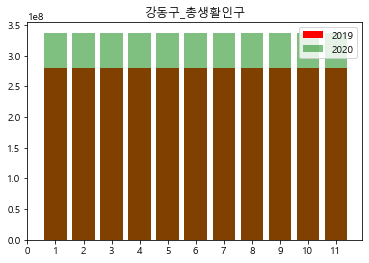

9125899


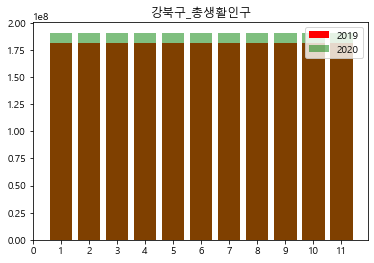

38239422


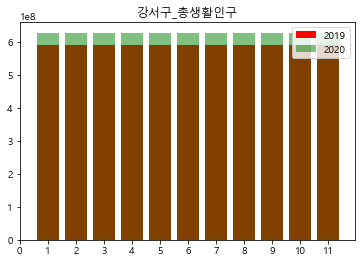

-16542739


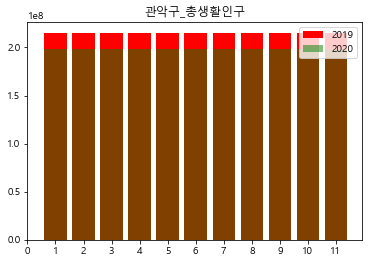

4695136


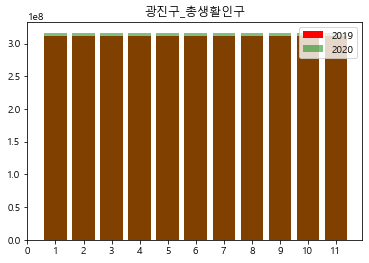

1462285


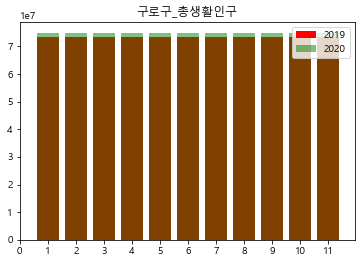

3817839


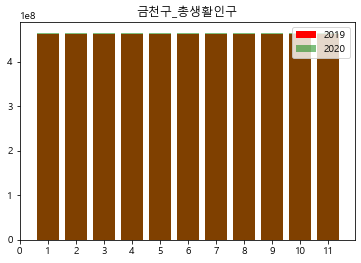

14808727


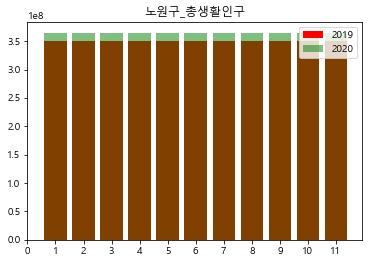

4305082


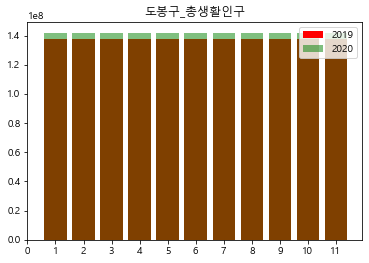

9806760


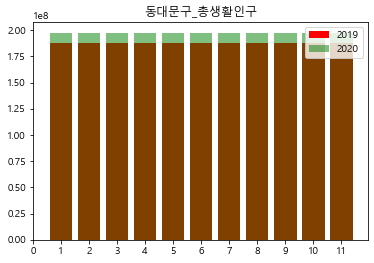

-48551678


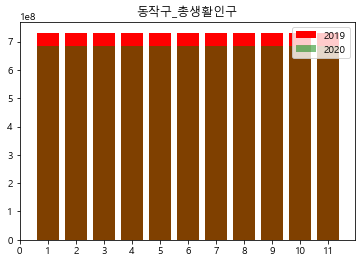

16947668


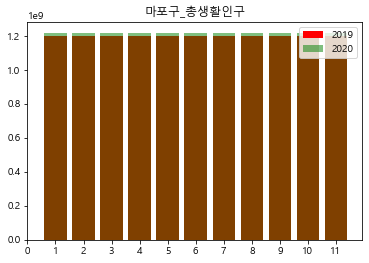

7950090


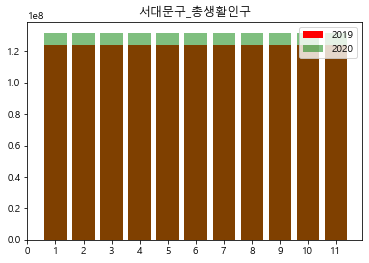

13795488


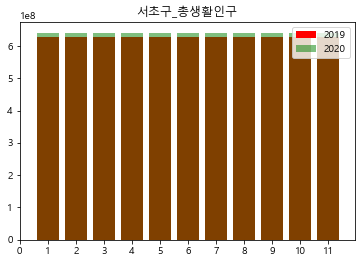

625807


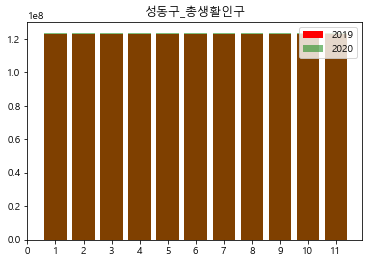

28002187


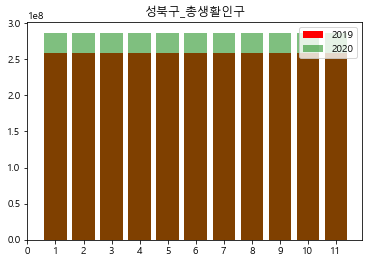

17449210


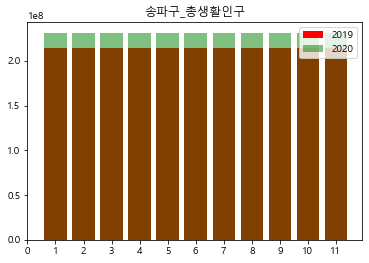

-8336298


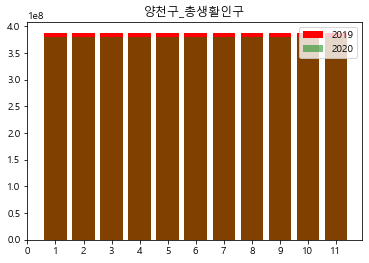

-15841635


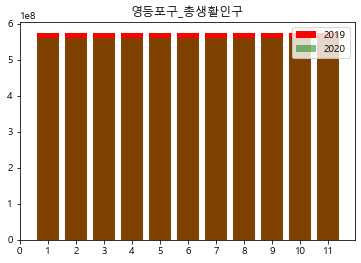

-140534348


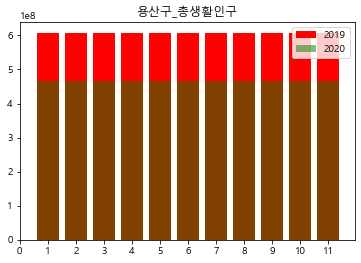

-8392423


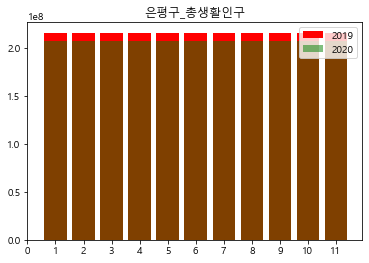

-27788224


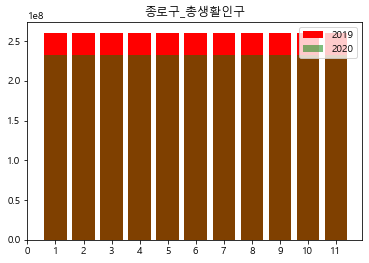

-207960030


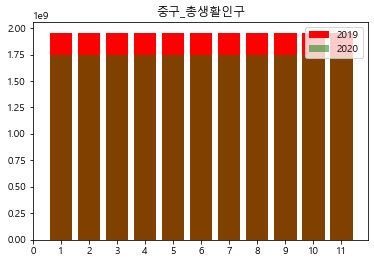

17794575


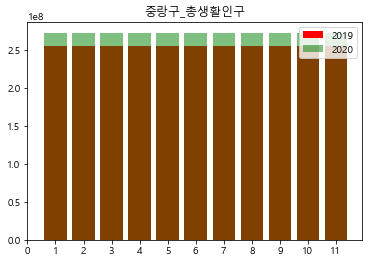

[('강동구', 57536426), ('강서구', 38239422), ('성북구', 28002187), ('중랑구', 17794575), ('송파구', 17449210), ('마포구', 16947668), ('노원구', 14808727), ('서초구', 13795488), ('동대문구', 9806760), ('강북구', 9125899), ('서대문구', 7950090), ('광진구', 4695136), ('도봉구', 4305082), ('금천구', 3817839), ('강남구', 2961443), ('구로구', 1462285), ('성동구', 625807), ('양천구', -8336298), ('은평구', -8392423), ('영등포구', -15841635), ('관악구', -16542739), ('종로구', -27788224), ('동작구', -48551678), ('용산구', -140534348), ('중구', -207960030)]


In [109]:
bar_width=1
alpha=0.5
city_sum={}
city_s=[]
for i in range(len(city)):
    
    p1=plt.bar([1,2,3,4,5,6,7,8,9,10,11],city_2019[city_2019['시군구명']==city[i]].iloc[:11,3].sum(),color='red',label='2019')
    p2=plt.bar([i+bar_width for i in range(11)],city_2020[city_2020['시군구명']==city[i]].iloc[:11,3].sum(),color='green',label='2020',alpha=alpha)
    print(city_2020[city_2020['시군구명']==city[i]].iloc[:11,3].sum()-city_2019[city_2019['시군구명']==city[i]].iloc[:11,3].sum())
    city_s.append(city_2020[city_2020['시군구명']==city[i]].iloc[:11,3].sum()-city_2019[city_2019['시군구명']==city[i]].iloc[:11,3].sum())
#     print(city_s)
    plt.legend()
    plt.title(city[i]+'_'+'총생활인구')
    plt.xticks([j for j in range(12)])
#         plt.savefig(dong_list[i]+'총생활인구수')
    plt.show()
    
for i in range(len(city)):
    city_sum[city[i]]=city_s[i]
def f2(x):
    return x[1]
a=sorted(city_sum.items(),key=f2,reverse=True)
print(a)

In [128]:
data_2020

,법정동코드,시간대구분,시군구명,읍면동명,행정동코드,총생활인구수,10대_남,20대_남,30대_남,10대_합,20대_합,30대_합,year,month
기준일ID,,,,,,,,,,,,,,
2020-01-01,11110101,0,종로구,청운효자동,11110515,14474,449,1272,986,806,2190,1997,2020,1
2020-01-01,11110101,1,종로구,청운효자동,11110515,14953,481,1252,923,855,2176,1930,2020,1
2020-01-01,11110101,2,종로구,청운효자동,11110515,14977,481,1283,930,852,2213,1950,2020,1
2020-01-01,11110101,3,종로구,청운효자동,11110515,15065,487,1305,934,865,2250,1962,2020,1
2020-01-01,11110101,4,종로구,청운효자동,11110515,14987,489,1299,948,854,2233,1982,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,11740110,19,강동구,강일동,11740515,45862,1404,2076,2941,2663,4292,6468,2020,12
2020-12-31,11740110,20,강동구,강일동,11740515,47225,1418,2181,2996,2797,4533,6718,2020,12
2020-12-31,11740110,21,강동구,강일동,11740515,48157,1482,2255,3034,2898,4712,6786,2020,12


증가 지역 : 강동구, 강서구, 성북구, 중랑구, 송파구 마포구 노원구 서초구 동대문구 강북구 서대문구 광진구 도봉구 금천구 강남구 구로구 성동구